In [69]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import geopandas as gpd

In [70]:

# Load the data
file1 = pd.read_csv('traffic data/LADOT_PPD_20240811.csv')
file2 = pd.read_csv('traffic data/Traffic_Collision_Data_from_2010_to_Present_20240811.csv')
file3 = pd.read_csv('traffic data/Traffic_Data.csv')

In [71]:
# Optionally, inspect the columns to decide on the key for merging
print(file1.columns)
print(file2.columns)
print(file3.columns)

Index(['the_geom', 'PPDNUM', 'PPDNAME'], dtype='object')
Index(['DR Number', 'Date Reported', 'Date Occurred', 'Time Occurred',
       'Area ID', 'Area Name', 'Reporting District', 'Crime Code',
       'Crime Code Description', 'MO Codes', 'Victim Age', 'Victim Sex',
       'Victim Descent', 'Premise Code', 'Premise Description', 'Address',
       'Cross Street', 'Location'],
      dtype='object')
Index(['X', 'Y', 'TrafficID', 'IntersectionID', 'lat', 'lon', 'intersection',
       'TOOLTIP', 'NLA_URL'],
      dtype='object')


In [72]:
print(file3.columns)

Index(['X', 'Y', 'TrafficID', 'IntersectionID', 'lat', 'lon', 'intersection',
       'TOOLTIP', 'NLA_URL'],
      dtype='object')


In [73]:
# Load file3
file3 = pd.read_csv('traffic data/Traffic_Data.csv')

# Inspect the first few rows
print(file3.head())


            X          Y  TrafficID  IntersectionID        lat         lon  \
0 -118.266512  33.786875          1          3667.0  33.786870 -118.266500   
1 -118.280752  33.786005          2          3680.0  33.786000 -118.280740   
2 -118.264362  33.771135          3          3727.0  33.771130 -118.264350   
3 -118.228334  33.782089          4          3787.0  33.782084 -118.228322   
4 -118.277342  33.797655          5          3839.0  33.797650 -118.277330   

                      intersection                                    TOOLTIP  \
0               ISLAND AVE at L ST               Location: ISLAND AVE at L ST   
1              FIGUEROA ST at L ST              Location: FIGUEROA ST at L ST   
2  FRIES AVE at HARRY BRIDGES BLVD  Location: FRIES AVE at HARRY BRIDGES BLVD   
3       ANAHEIM ST AT FARRAGUT AVE       Location: ANAHEIM ST AT FARRAGUT AVE   
4            DON ST at FRIGATE AVE            Location: DON ST at FRIGATE AVE   

                                            

In [74]:
# Check for missing values
print(file3.isnull().sum())

# Fill or drop missing values as needed
file3.fillna(0, inplace=True)  # or use file3.dropna() to remove them

# Optional: Filter columns to keep only relevant ones
relevant_columns = ['IntersectionID', 'lat', 'lon', 'TrafficID','intersection', 'TOOLTIP', 'NLA_URL','X','Y']
file3 = file3[relevant_columns]


X                    0
Y                    0
TrafficID            0
IntersectionID    1461
lat                  0
lon                  0
intersection         9
TOOLTIP              0
NLA_URL              0
dtype: int64


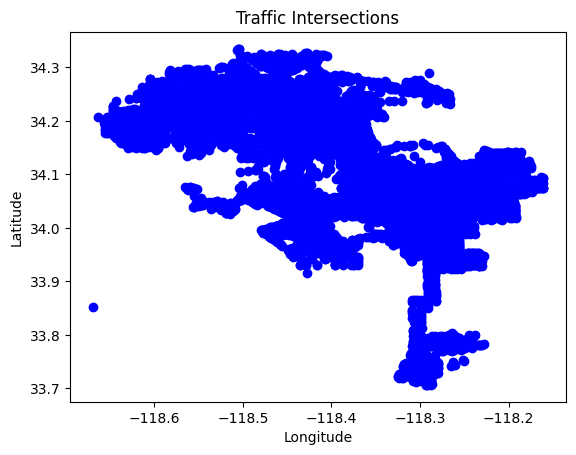

In [75]:
# Example: Plot the locations of intersections on a scatter plot
plt.scatter(file3['lon'], file3['lat'], c='blue', marker='o')
plt.title('Traffic Intersections')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [76]:
file3.to_csv('traffic data/processed_traffic_data.csv', index=False)


In [77]:
# Remove duplicate rows, if any
file3.drop_duplicates(inplace=True)


In [78]:
file3.columns

Index(['IntersectionID', 'lat', 'lon', 'TrafficID', 'intersection', 'TOOLTIP',
       'NLA_URL', 'X', 'Y'],
      dtype='object')

In [79]:
# Convert data types if necessary
file3['lat'] = pd.to_numeric(file3['lat'], errors='coerce')
file3['lon'] = pd.to_numeric(file3['lon'], errors='coerce')
# Add similar conversions for other columns if needed


In [80]:
# Example: Group by intersection and count occurrences
traffic_by_intersection = file3.groupby('intersection').size().reset_index(name='count')
print(traffic_by_intersection)


                                 intersection  count
0                                           0      9
1                                                 31
2                  102nd ST Dwy at COMPTON AV      1
3       108TH ST BTWN COMPTON AV & GRANDEE AV      1
4                 11th St 170 ft W/O Elden Av      1
...                                       ...    ...
11185  sepulveda bl. filtration plant dwy # 1      1
11186  sepulveda bl. filtration plant dwy # 2      1
11187         stadium way and elysian park dr      1
11188      vernon between hoover anf figueroa      1
11189                 york bl at york hill pl      1

[11190 rows x 2 columns]


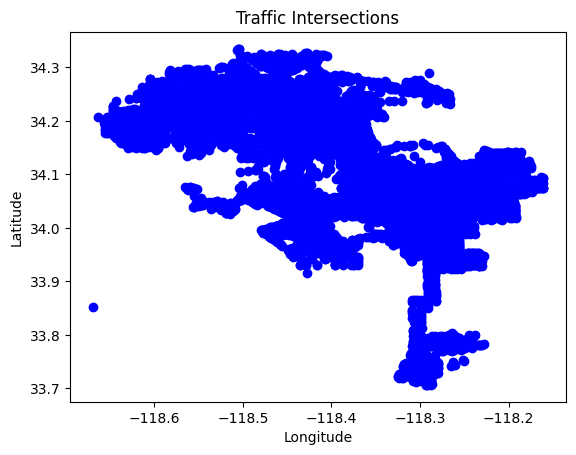

In [81]:
# Plot the locations of intersections
plt.scatter(file3['lon'], file3['lat'], c='blue', marker='o')
plt.title('Traffic Intersections')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [82]:
# Example: Analyze incidents by date or time
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


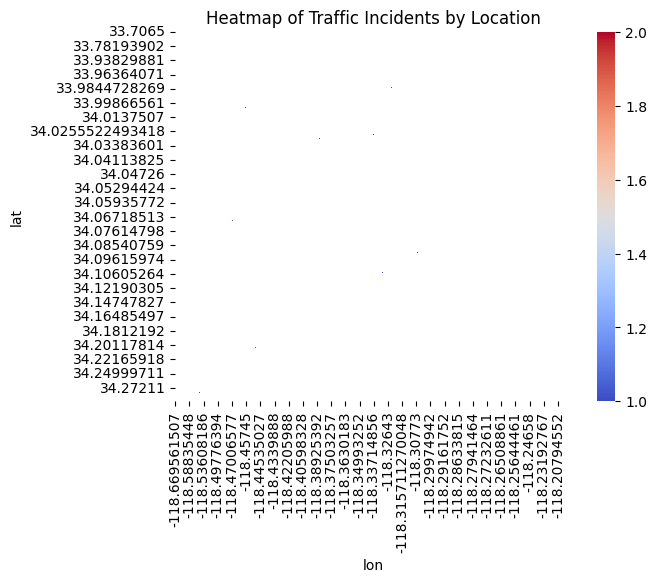

In [83]:
# Example: Heatmap of traffic incidents by intersection
sns.heatmap(file3.pivot_table(index='lat', columns='lon', values='TrafficID', aggfunc='count'), cmap='coolwarm')
plt.title('Heatmap of Traffic Incidents by Location')
plt.show()


                                 intersection  count
0                                           0      9
1                                                 31
2                  102nd ST Dwy at COMPTON AV      1
3       108TH ST BTWN COMPTON AV & GRANDEE AV      1
4                 11th St 170 ft W/O Elden Av      1
...                                       ...    ...
11185  sepulveda bl. filtration plant dwy # 1      1
11186  sepulveda bl. filtration plant dwy # 2      1
11187         stadium way and elysian park dr      1
11188      vernon between hoover anf figueroa      1
11189                 york bl at york hill pl      1

[11190 rows x 2 columns]


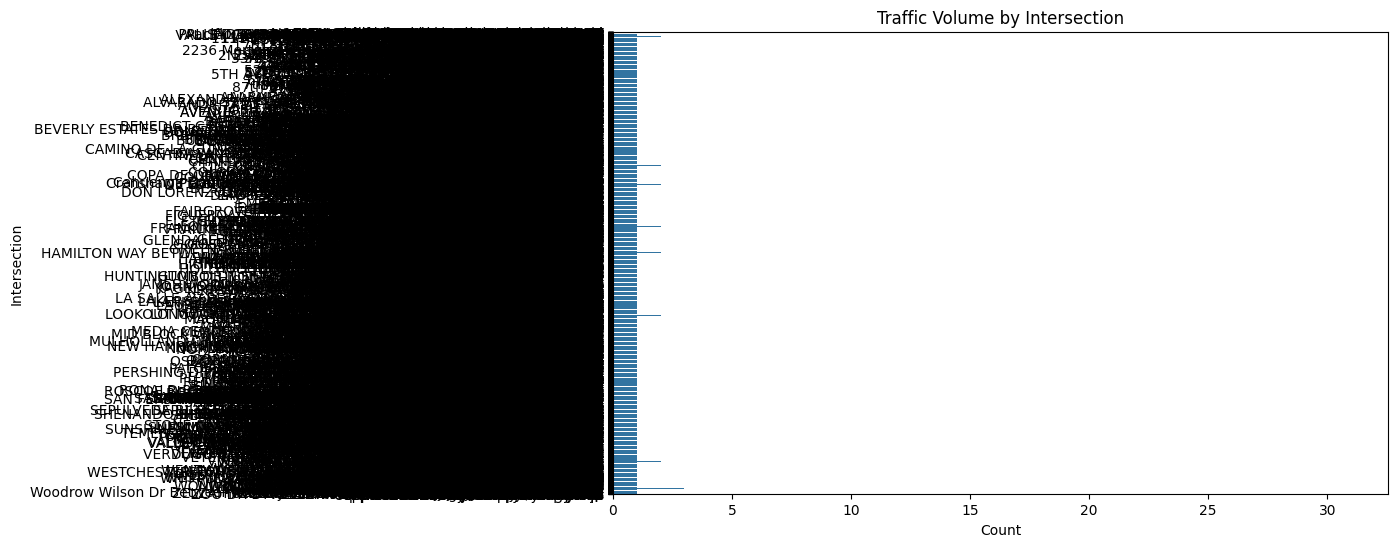

In [84]:
# Example: Count occurrences of each intersection
traffic_by_intersection = file3.groupby('intersection').size().reset_index(name='count')
print(traffic_by_intersection)

# Plotting the traffic volume at different intersections
plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='intersection', data=traffic_by_intersection)
plt.title('Traffic Volume by Intersection')
plt.xlabel('Count')
plt.ylabel('Intersection')
plt.show()


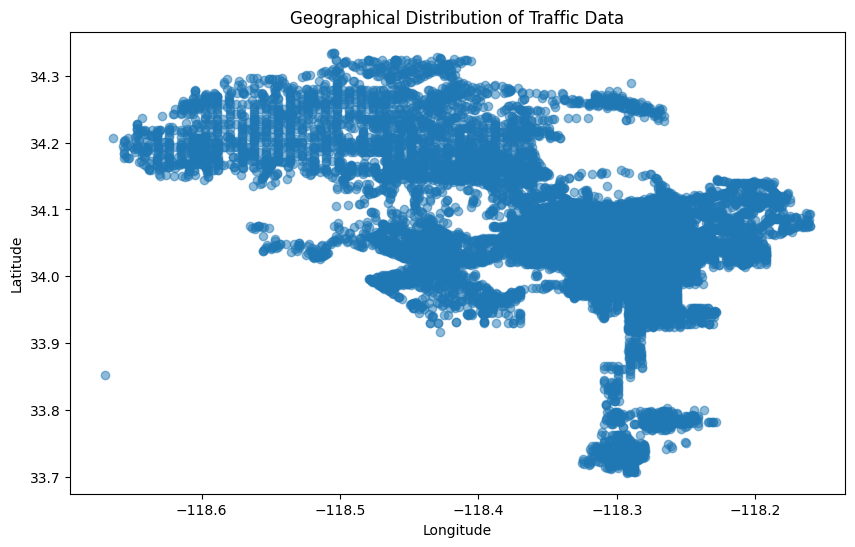

In [85]:
# Scatter plot of traffic locations
plt.figure(figsize=(10, 6))
plt.scatter(file3['lon'], file3['lat'], alpha=0.5)
plt.title('Geographical Distribution of Traffic Data')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [86]:
# Example: Analyzing intersections with a specific feature or tooltip
specific_tooltip = file3[file3['TOOLTIP'] == 'Specific Tooltip']
print(specific_tooltip.head())


Empty DataFrame
Columns: [IntersectionID, lat, lon, TrafficID, intersection, TOOLTIP, NLA_URL, X, Y]
Index: []


In [87]:
# Example: Analyzing intersections with a specific feature or tooltip
specific_tooltip = file3[file3['TOOLTIP'] == 'Specific Tooltip']
print(specific_tooltip.head())


Empty DataFrame
Columns: [IntersectionID, lat, lon, TrafficID, intersection, TOOLTIP, NLA_URL, X, Y]
Index: []


In [88]:
# Group by intersection to calculate the total traffic volume at each intersection
traffic_by_intersection = file3.groupby('intersection').size().reset_index(name='traffic_count')

# Sort to find the busiest intersections
busiest_intersections = traffic_by_intersection.sort_values(by='traffic_count', ascending=False)
print(busiest_intersections.head(10))  # Display the top 10 busiest intersections


                                            intersection  traffic_count
1                                                                    31
8819                    SAN DIEGO FRWY at SEPULVEDA BLVD             11
0                                                      0              9
5092      GOLDEN STATE FRWY at SAN FERNANDO MISSION BLVD              4
4480                          FIGUEROA ST at HARBOR FRWY              4
6446                    LA TIJERA BLVD at SAN DIEGO FRWY              4
10183                       VENTURA FRWY at VENTURA BLVD              3
5014   GLENDALE FRWY at SAN FERNANDO ROAD NORTHEAST R...              3
4586                         FLORENCE AVE at VERMONT AVE              3
7508                          Mid Block Ped Count Zone 1              3


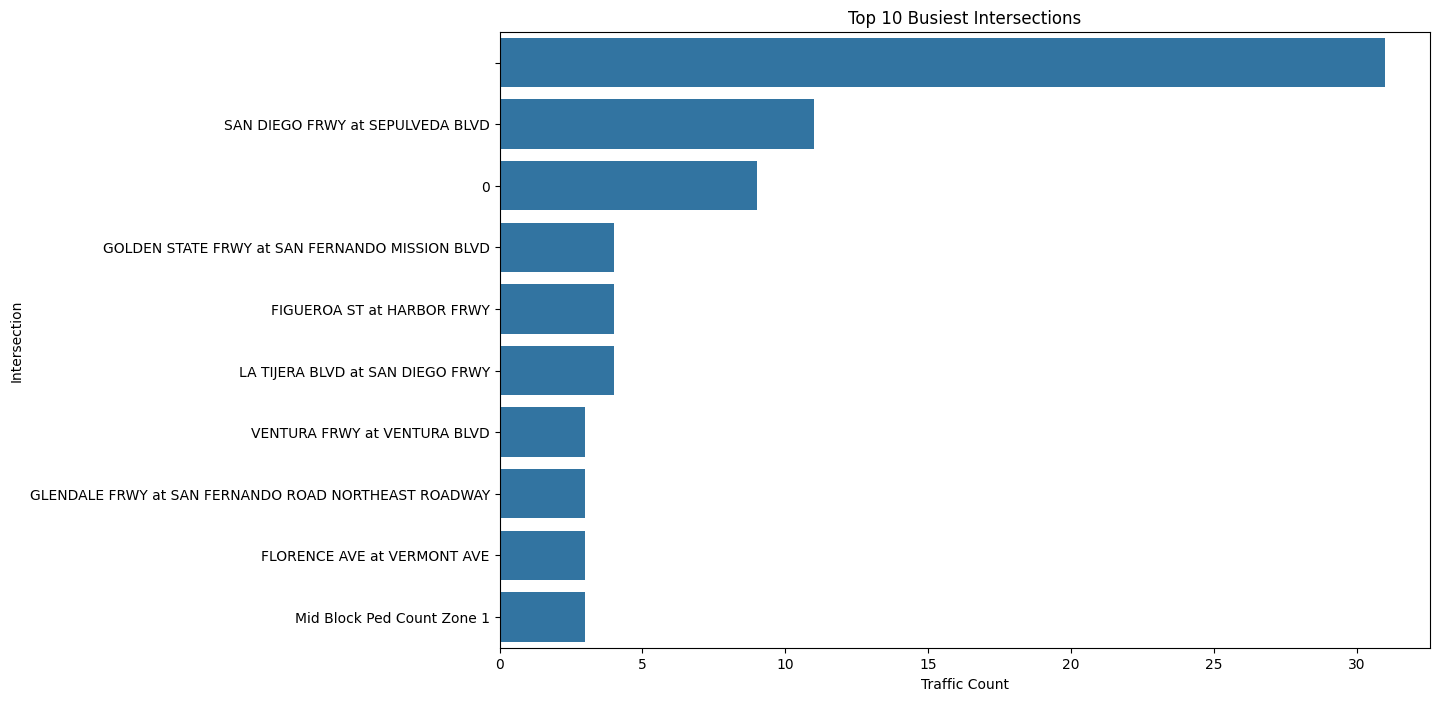

In [89]:
plt.figure(figsize=(12, 8))
sns.barplot(x='traffic_count', y='intersection', data=busiest_intersections.head(10))
plt.title('Top 10 Busiest Intersections')
plt.xlabel('Traffic Count')
plt.ylabel('Intersection')
plt.show()


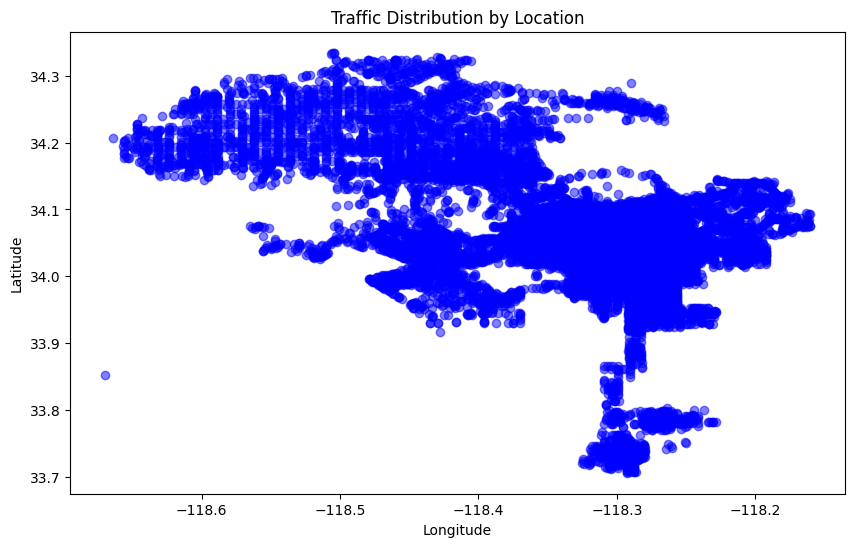

In [90]:
# Scatter plot of traffic data locations
plt.figure(figsize=(10, 6))
plt.scatter(file3['lon'], file3['lat'], alpha=0.5, c='blue')
plt.title('Traffic Distribution by Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [91]:
# Save the final processed data
file3.to_csv('traffic data/processed_traffic_data_final.csv', index=False)

# Save analysis scripts and visualizations
# Example: plt.savefig('traffic_analysis_plot.png')


In [92]:
# Load the shapefile
shapefile_path = "traffic data/traffic lights/geo_export_100fe6d0-5380-4c99-ba7f-7ae8b3cbed75.shp"
traffic_lights = gpd.read_file(shapefile_path)

# Inspect the first few rows
print(traffic_lights.head())


     lampa    lampb lampc lampd lampe lampf lastplan  \
0  55W LED  55W LED  None  None  None  None   SL7332   
1  55W LED  55W LED  None  None  None  None   SL7332   
2  55W LED  55W LED  None  None  None  None   SL7332   
3  55W LED  55W LED  None  None  None  None   SL7332   
4  55W LED  55W LED  None  None  None  None   SL7332   

                   postdesc      slid   status      stlid  \
0  25' Ameron Rnd Conc Pole  198740.0  AsBuilt  SL5552-53   
1  25' Ameron Rnd Conc Pole  198741.0  AsBuilt  SL5552-54   
2  25' Ameron Rnd Conc Pole  198742.0  AsBuilt  SL5552-55   
3  25' Ameron Rnd Conc Pole  198743.0  AsBuilt  SL5552-56   
4  25' Ameron Rnd Conc Pole  198744.0  AsBuilt  SL5552-57   

                      geometry  
0  POINT (-118.47789 33.99161)  
1  POINT (-118.47805 33.99179)  
2  POINT (-118.47819 33.99195)  
3  POINT (-118.47832 33.99210)  
4  POINT (-118.47847 33.99228)  


In [93]:
print(traffic_lights.columns)


Index(['lampa', 'lampb', 'lampc', 'lampd', 'lampe', 'lampf', 'lastplan',
       'postdesc', 'slid', 'status', 'stlid', 'geometry'],
      dtype='object')


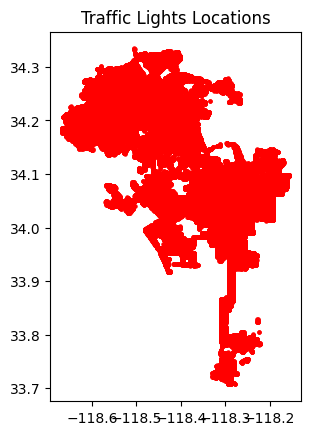

In [94]:
traffic_lights.plot(marker='o', color='red', markersize=5)
plt.title('Traffic Lights Locations')
plt.show()


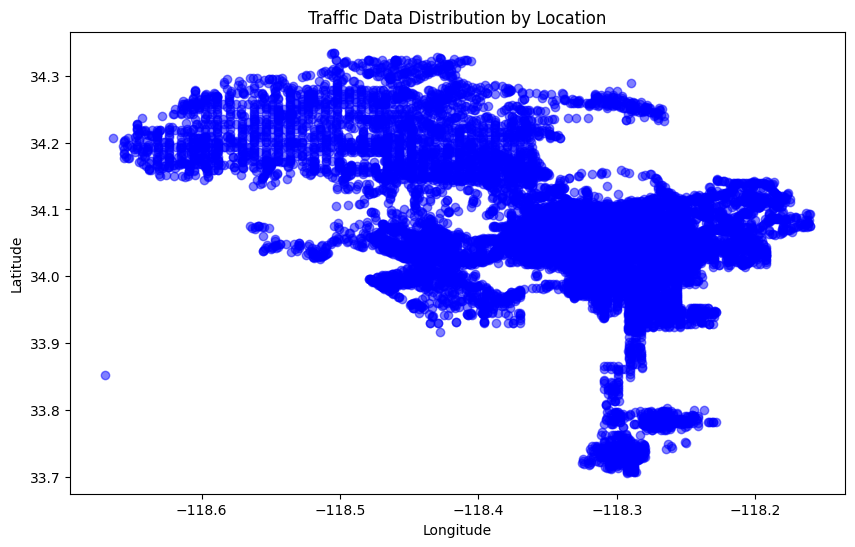

In [95]:
# Scatter plot of traffic data locations
plt.figure(figsize=(10, 6))
plt.scatter(file3['lon'], file3['lat'], alpha=0.5, c='blue')
plt.title('Traffic Data Distribution by Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


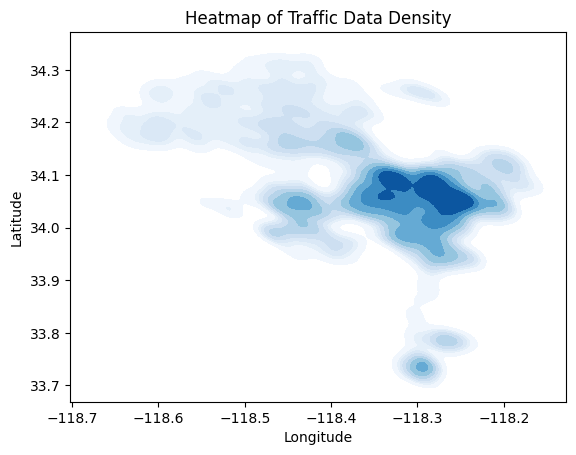

In [96]:
sns.kdeplot(x=file3['lon'], y=file3['lat'], fill=True, cmap="Blues", bw_adjust=0.5)
plt.title('Heatmap of Traffic Data Density')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [97]:
# Count the number of data points per intersection (if available)
traffic_by_intersection = file3.groupby('intersection').size().reset_index(name='traffic_count')
busiest_intersections = traffic_by_intersection.sort_values(by='traffic_count', ascending=False)
print(busiest_intersections.head(10))  # Top 10 busiest intersections


                                            intersection  traffic_count
1                                                                    31
8819                    SAN DIEGO FRWY at SEPULVEDA BLVD             11
0                                                      0              9
5092      GOLDEN STATE FRWY at SAN FERNANDO MISSION BLVD              4
4480                          FIGUEROA ST at HARBOR FRWY              4
6446                    LA TIJERA BLVD at SAN DIEGO FRWY              4
10183                       VENTURA FRWY at VENTURA BLVD              3
5014   GLENDALE FRWY at SAN FERNANDO ROAD NORTHEAST R...              3
4586                         FLORENCE AVE at VERMONT AVE              3
7508                          Mid Block Ped Count Zone 1              3


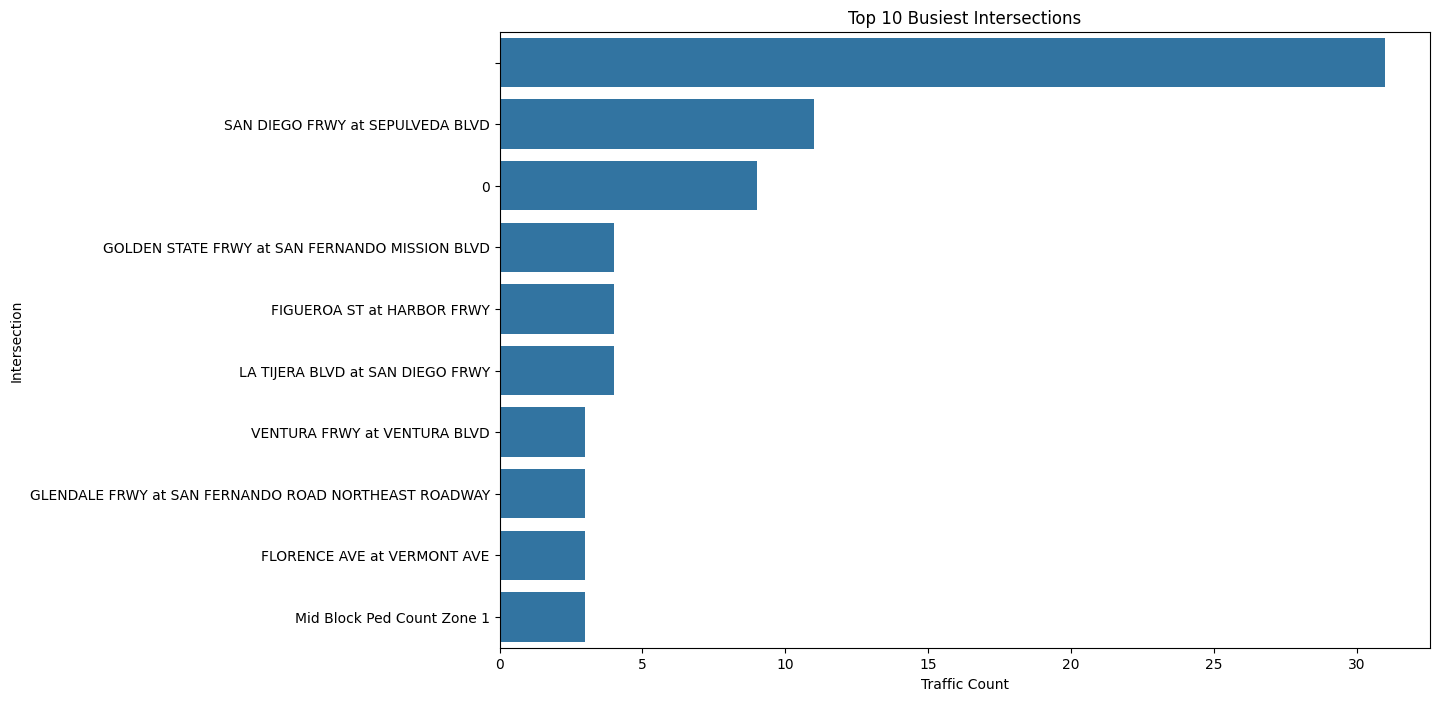

In [98]:
plt.figure(figsize=(12, 8))
sns.barplot(x='traffic_count', y='intersection', data=busiest_intersections.head(10))
plt.title('Top 10 Busiest Intersections')
plt.xlabel('Traffic Count')
plt.ylabel('Intersection')
plt.show()


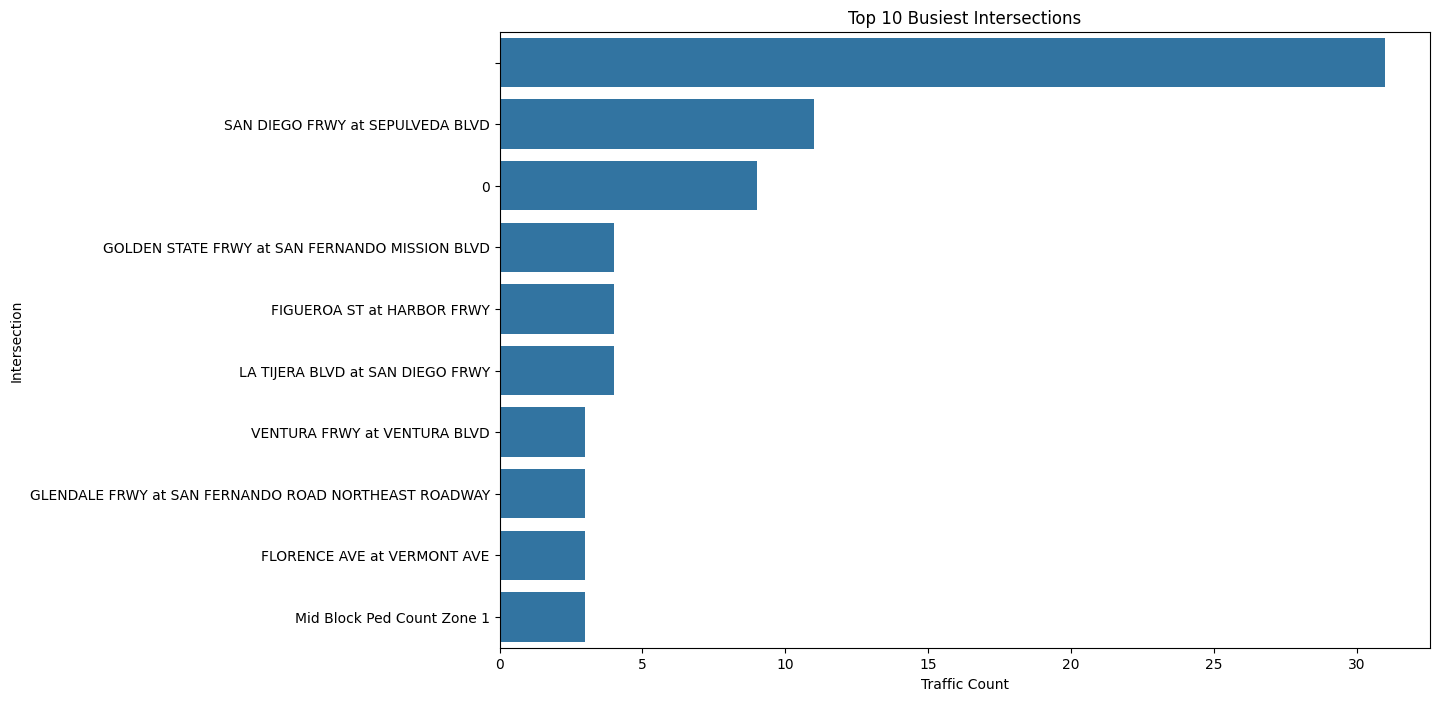

In [99]:
plt.figure(figsize=(12, 8))
sns.barplot(x='traffic_count', y='intersection', data=busiest_intersections.head(10))
plt.title('Top 10 Busiest Intersections')
plt.xlabel('Traffic Count')
plt.ylabel('Intersection')
plt.show()


In [100]:
# Example: Check unique values in TOOLTIP
print(file3['TOOLTIP'].unique())


['Location: ISLAND AVE at L ST' 'Location: FIGUEROA ST at L ST'
 'Location: FRIES AVE at HARRY BRIDGES BLVD' ...
 'Location: LANGMUIR AVE at HILLROSE ST\\nData not available yet'
 'Location: SIGSBEE AVE at ANAHEIM ST\\nData not available yet'
 'Location: Between Imperial St and Mateo St\\nData not available yet']


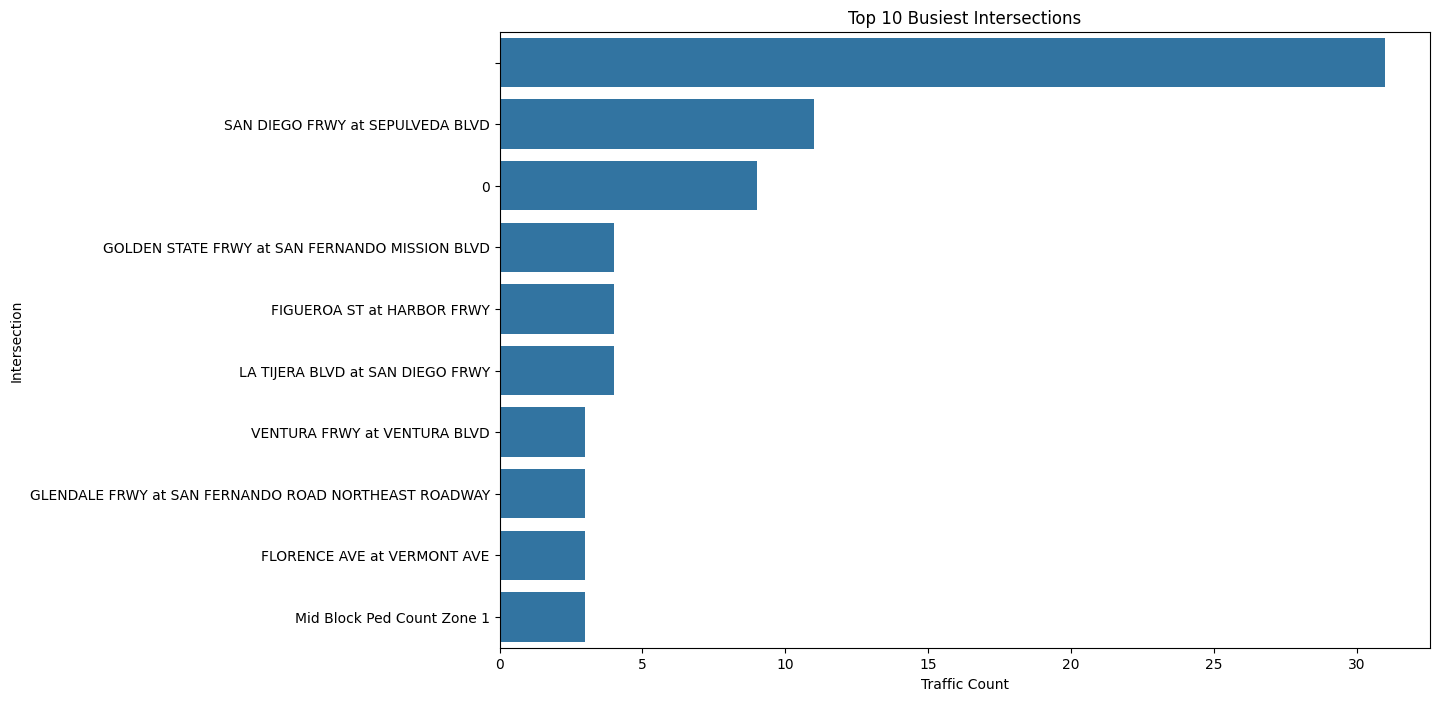

In [101]:
# Save the busiest intersections plot
plt.figure(figsize=(12, 8))
sns.barplot(x='traffic_count', y='intersection', data=busiest_intersections.head(10))
plt.title('Top 10 Busiest Intersections')
plt.xlabel('Traffic Count')
plt.ylabel('Intersection')
plt.savefig('traffic data/busiest_intersections.png')


In [102]:
!pip install scikit-learn


Defaulting to user installation because normal site-packages is not writeable


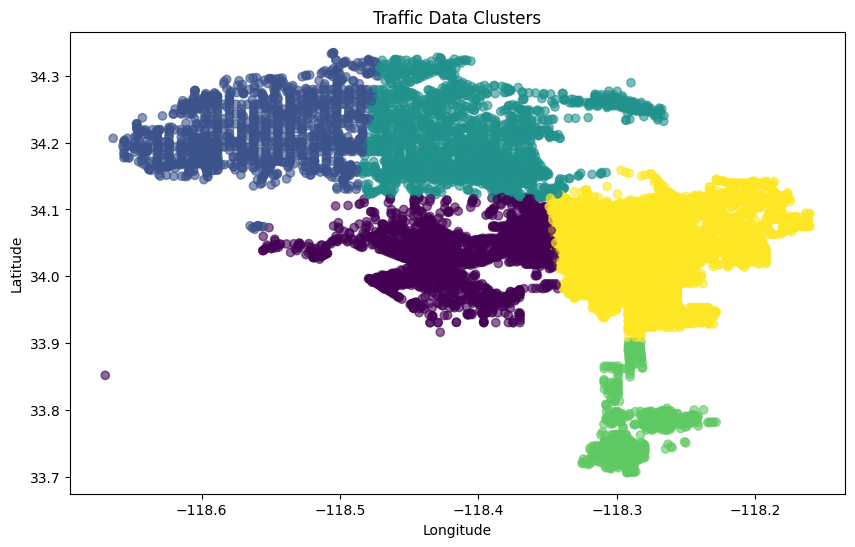

In [103]:
from sklearn.cluster import KMeans

# Extract relevant columns for clustering
coords = file3[['lat', 'lon']].dropna()

# Apply K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(coords)

# Add cluster labels to your DataFrame
file3['cluster'] = clusters

# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(file3['lon'], file3['lat'], c=file3['cluster'], cmap='viridis', alpha=0.6)
plt.title('Traffic Data Clusters')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


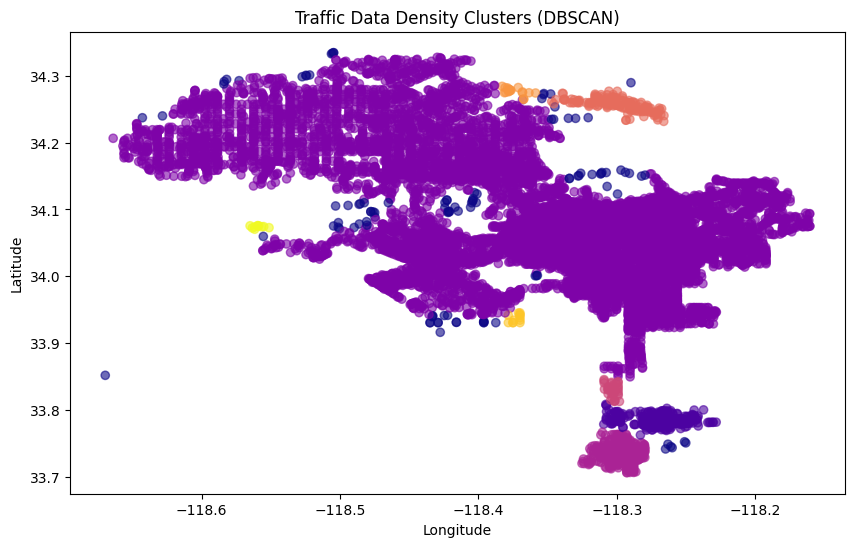

In [104]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN clustering
db = DBSCAN(eps=0.01, min_samples=10).fit(coords)
file3['db_cluster'] = db.labels_

# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(file3['lon'], file3['lat'], c=file3['db_cluster'], cmap='plasma', alpha=0.6)
plt.title('Traffic Data Density Clusters (DBSCAN)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


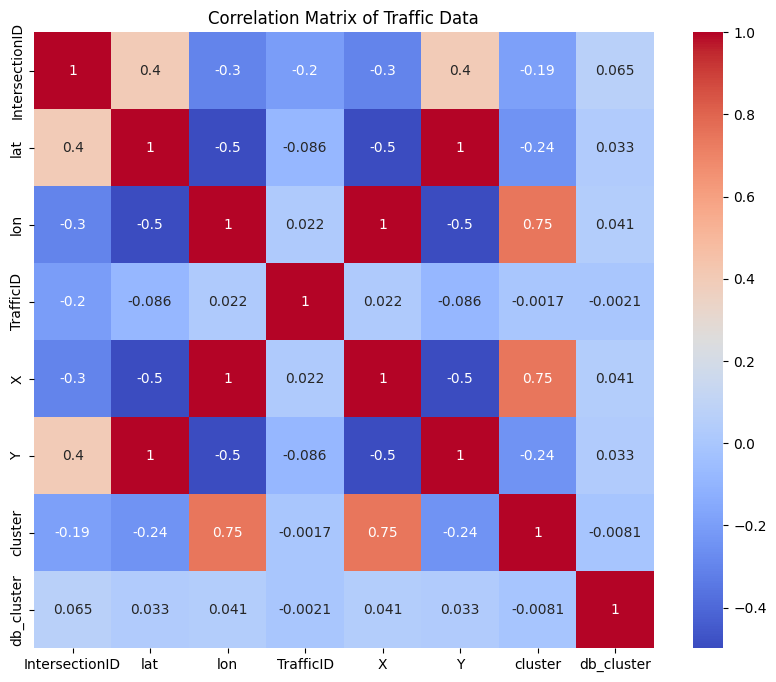

In [105]:
# Select only numeric columns
numeric_data = file3.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Traffic Data')
plt.show()


In [106]:
sample_data = file3.sample(frac=0.1, random_state=42)  # Use 10% of the data
encoded_data = pd.get_dummies(sample_data, drop_first=True)


In [107]:
file3.columns


Index(['IntersectionID', 'lat', 'lon', 'TrafficID', 'intersection', 'TOOLTIP',
       'NLA_URL', 'X', 'Y', 'cluster', 'db_cluster'],
      dtype='object')

In [108]:
correlation_matrix = file3[['lat', 'lon']].corr()


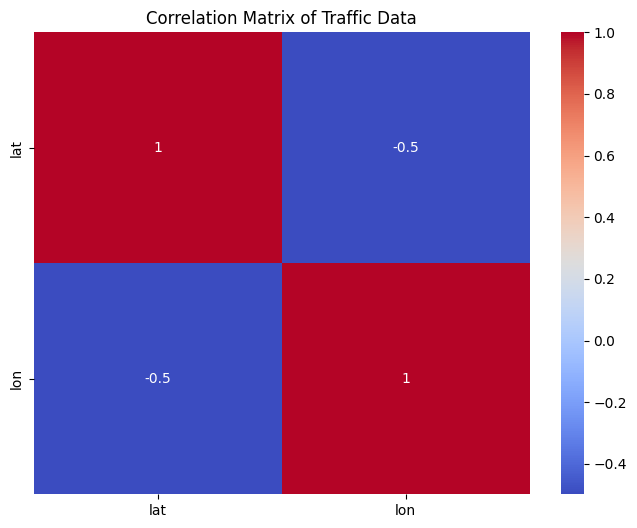

In [109]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Traffic Data')
plt.show()


In [110]:
sample_data = file3.sample(frac=0.1, random_state=42)  # 10% sample
encoded_data = pd.get_dummies(sample_data, drop_first=True)


In [111]:
!pip install dask[complete]


Defaulting to user installation because normal site-packages is not writeable


In [112]:
!pip uninstall pyarrow -y
!pip install pyarrow==10.0.1


Found existing installation: pyarrow 10.0.1
Uninstalling pyarrow-10.0.1:
  Successfully uninstalled pyarrow-10.0.1
Defaulting to user installation because normal site-packages is not writeable
  Using cached pyarrow-10.0.1-cp311-cp311-win_amd64.whl.metadata (3.1 kB)
Using cached pyarrow-10.0.1-cp311-cp311-win_amd64.whl (20.2 MB)


In [113]:
!pip list


Package                   Version
------------------------- --------------
anyio                     4.4.0
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 2.4.1
async-lru                 2.0.4
attrs                     24.2.0
babel                     2.16.0
beautifulsoup4            4.12.3
bleach                    6.1.0
bokeh                     3.5.1
branca                    0.7.2
certifi                   2024.7.4
cffi                      1.17.0
charset-normalizer        3.3.2
click                     8.1.7
click-plugins             1.1.1
cligj                     0.7.2
cloudpickle               3.0.0
colorama                  0.4.6
comm                      0.2.2
contourpy                 1.2.1
cycler                    0.12.1
dask                      2024.8.1
dask-expr                 1.1.11
debugpy                   1.8.5
decorator                 5.1.1
defusedxml                0.7.1
distributed    

In [114]:
!pip install --upgrade dask


Defaulting to user installation because normal site-packages is not writeable


In [115]:
encoded_data = pd.get_dummies(file3, drop_first=True, sparse=True)


In [116]:
coords = file3[['X','Y','lat', 'lon']]


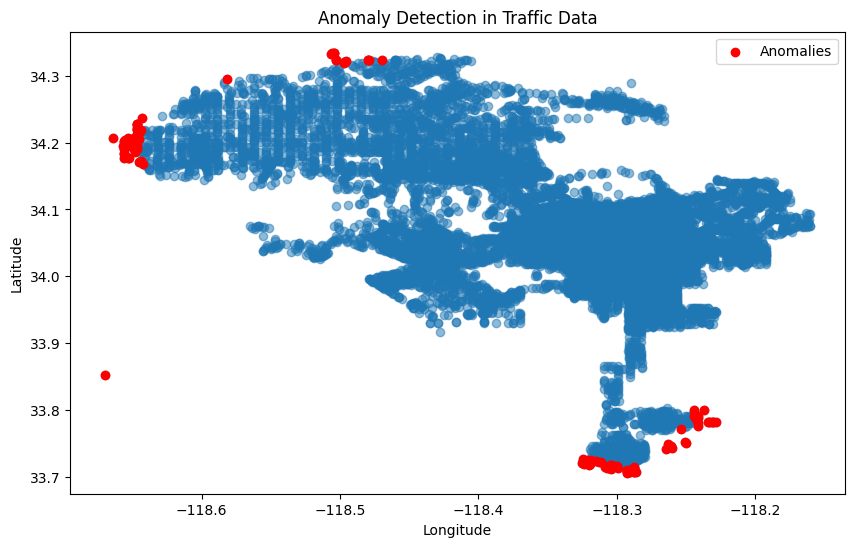

In [117]:
from sklearn.ensemble import IsolationForest

# Apply Isolation Forest for anomaly detection
iso_forest = IsolationForest(contamination=0.01, random_state=42)
file3['anomaly'] = iso_forest.fit_predict(coords)

# Filter and visualize anomalies
anomalies = file3[file3['anomaly'] == -1]
plt.figure(figsize=(10, 6))
plt.scatter(file3['lon'], file3['lat'], alpha=0.5)
plt.scatter(anomalies['lon'], anomalies['lat'], color='red', label='Anomalies')
plt.title('Anomaly Detection in Traffic Data')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()


In [118]:
import pandas as pd

# Load the weather data from the CSV file
weather_data = pd.read_csv('weather_condition.csv')

# Display the first few rows to inspect the data
print(weather_data.head())


         date  tavg  tmin  tmax  prcp  snow  wdir  wspd  wpgt    pres  tsun
0  2024-01-01  13.9  10.0  19.0   0.0   NaN   357   9.4   NaN  1018.8   NaN
1  2024-01-02  13.1   8.0  19.4   0.0   NaN    17   7.5   NaN  1022.9   NaN
2  2024-01-03  13.7  10.6  18.3   1.9   NaN   344   5.7   NaN  1018.3   NaN
3  2024-01-04  13.7  10.6  18.3   0.0   NaN     6   4.1   NaN  1020.1   NaN
4  2024-01-05  12.7   8.3  18.9   0.0   NaN     0   3.6   NaN  1020.9   NaN


In [119]:
# Check the column names in file3
print(file3.columns)

# Check the column names in weather_data
print(weather_data.columns)


Index(['IntersectionID', 'lat', 'lon', 'TrafficID', 'intersection', 'TOOLTIP',
       'NLA_URL', 'X', 'Y', 'cluster', 'db_cluster', 'anomaly'],
      dtype='object')
Index(['date', 'tavg', 'tmin', 'tmax', 'prcp', 'snow', 'wdir', 'wspd', 'wpgt',
       'pres', 'tsun'],
      dtype='object')


In [120]:
file3['date'] = '2024-01-01'

# Now you can merge
merged_data = pd.merge(file3, weather_data, on='date')


In [121]:
print(weather_data.columns)


Index(['date', 'tavg', 'tmin', 'tmax', 'prcp', 'snow', 'wdir', 'wspd', 'wpgt',
       'pres', 'tsun'],
      dtype='object')


In [122]:
# Check the columns in file3
print(file3.columns)

# Check the columns in merged_data after merging
print(merged_data.columns)


Index(['IntersectionID', 'lat', 'lon', 'TrafficID', 'intersection', 'TOOLTIP',
       'NLA_URL', 'X', 'Y', 'cluster', 'db_cluster', 'anomaly', 'date'],
      dtype='object')
Index(['IntersectionID', 'lat', 'lon', 'TrafficID', 'intersection', 'TOOLTIP',
       'NLA_URL', 'X', 'Y', 'cluster', 'db_cluster', 'anomaly', 'date', 'tavg',
       'tmin', 'tmax', 'prcp', 'snow', 'wdir', 'wspd', 'wpgt', 'pres', 'tsun'],
      dtype='object')


In [123]:
def categorize_weather(row):
    if row['prcp'] > 0:
        return 'Rainy'
    elif row['snow'] > 0:
        return 'Snowy'
    elif row['tmax'] > 30:
        return 'Hot'
    elif row['tmax'] < 0:
        return 'Cold'
    else:
        return 'Clear'

# Apply the function to create a new column in weather_data
weather_data['weather_condition'] = weather_data.apply(categorize_weather, axis=1)

# Now check the updated weather_data
print(weather_data.head())


         date  tavg  tmin  tmax  prcp  snow  wdir  wspd  wpgt    pres  tsun  \
0  2024-01-01  13.9  10.0  19.0   0.0   NaN   357   9.4   NaN  1018.8   NaN   
1  2024-01-02  13.1   8.0  19.4   0.0   NaN    17   7.5   NaN  1022.9   NaN   
2  2024-01-03  13.7  10.6  18.3   1.9   NaN   344   5.7   NaN  1018.3   NaN   
3  2024-01-04  13.7  10.6  18.3   0.0   NaN     6   4.1   NaN  1020.1   NaN   
4  2024-01-05  12.7   8.3  18.9   0.0   NaN     0   3.6   NaN  1020.9   NaN   

  weather_condition  
0             Clear  
1             Clear  
2             Rainy  
3             Clear  
4             Clear  


In [124]:
# Merge the traffic data with the weather data on the 'date' column
merged_data = pd.merge(file3, weather_data, on='date')

# Check the columns in merged_data to ensure the merge worked correctly
print(merged_data.columns)


Index(['IntersectionID', 'lat', 'lon', 'TrafficID', 'intersection', 'TOOLTIP',
       'NLA_URL', 'X', 'Y', 'cluster', 'db_cluster', 'anomaly', 'date', 'tavg',
       'tmin', 'tmax', 'prcp', 'snow', 'wdir', 'wspd', 'wpgt', 'pres', 'tsun',
       'weather_condition'],
      dtype='object')


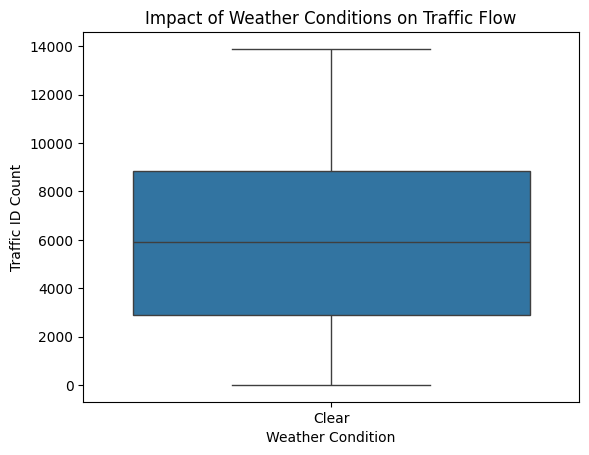

In [125]:
# Create a boxplot to analyze the impact of weather conditions on traffic
sns.boxplot(x='weather_condition', y='TrafficID', data=merged_data)
plt.title('Impact of Weather Conditions on Traffic Flow')
plt.xlabel('Weather Condition')
plt.ylabel('Traffic ID Count')
plt.show()


In [126]:
!pip install folium


Defaulting to user installation because normal site-packages is not writeable


In [127]:
import folium

# Create a base map
m = folium.Map(location=[34.0522, -118.2437], zoom_start=10)

# Add traffic points to the map
for _, row in file3.iterrows():
    folium.Marker([row['lat'], row['lon']], tooltip=row['TOOLTIP']).add_to(m)

# Display the map
m.save('traffic_map.html')


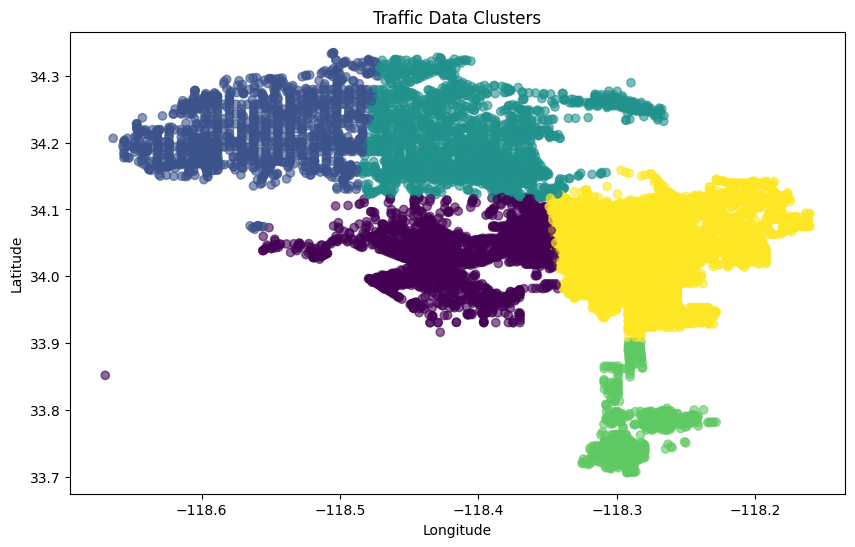

In [128]:
from sklearn.cluster import KMeans

# Extract relevant columns for clustering
coords = file3[['lat', 'lon']].dropna()

# Apply K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
file3['cluster'] = kmeans.fit_predict(coords)

# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(file3['lon'], file3['lat'], c=file3['cluster'], cmap='viridis', alpha=0.6)
plt.title('Traffic Data Clusters')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


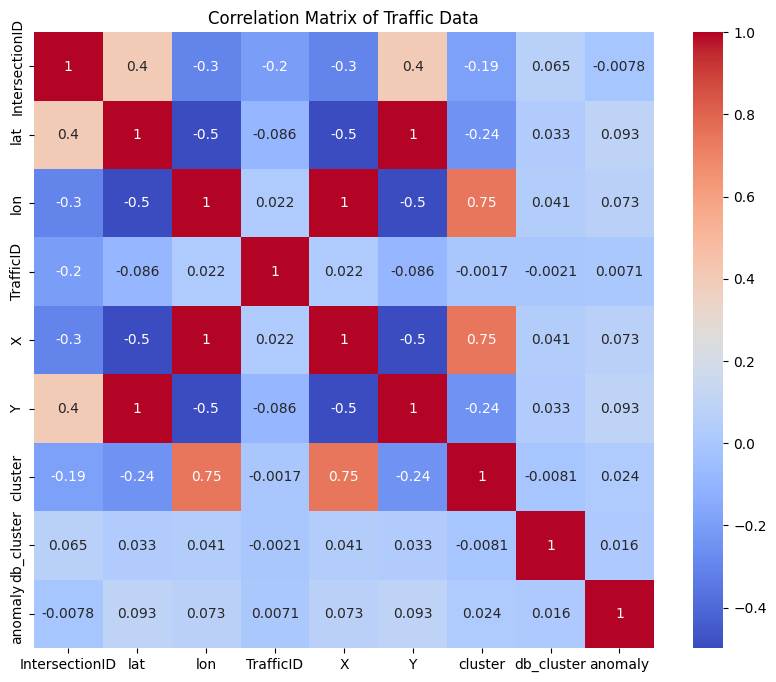

In [129]:
# Select only numeric columns
numeric_data = file3.select_dtypes(include=[float, int])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Traffic Data')
plt.show()


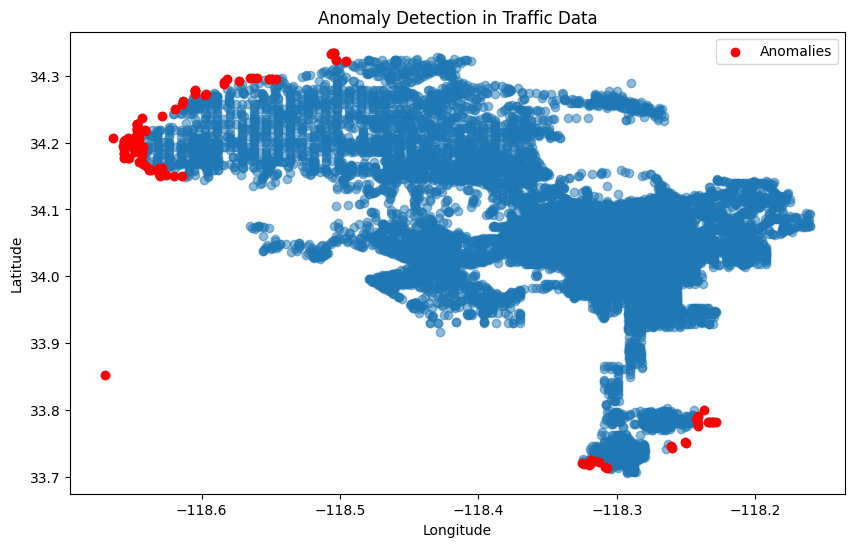

In [130]:
from sklearn.ensemble import IsolationForest

# Apply Isolation Forest for anomaly detection
iso_forest = IsolationForest(contamination=0.01, random_state=42)
file3['anomaly'] = iso_forest.fit_predict(coords)

# Filter and visualize anomalies
anomalies = file3[file3['anomaly'] == -1]
plt.figure(figsize=(10, 6))
plt.scatter(file3['lon'], file3['lat'], alpha=0.5)
plt.scatter(anomalies['lon'], anomalies['lat'], color='red', label='Anomalies')
plt.title('Anomaly Detection in Traffic Data')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()


In [131]:
import folium

# Create a base map centered around LA
m = folium.Map(location=[34.0522, -118.2437], zoom_start=10)

# Add traffic points to the map
for _, row in file3.iterrows():
    folium.Marker([row['lat'], row['lon']], tooltip=row['TOOLTIP']).add_to(m)

# Save the map as an HTML file
m.save('traffic_map.html')


In [132]:
from folium.plugins import MarkerCluster

# Create a base map
m = folium.Map(location=[34.0522, -118.2437], zoom_start=10)

# Add marker clusters instead of individual markers
marker_cluster = MarkerCluster().add_to(m)

for _, row in file3.iterrows():
    folium.Marker([row['lat'], row['lon']], tooltip=row['TOOLTIP']).add_to(marker_cluster)

# Save the map as an HTML file
m.save('optimized_traffic_map.html')


In [133]:
from folium.plugins import HeatMap

# Create a base map
m = folium.Map(location=[34.0522, -118.2437], zoom_start=10)

# Add heatmap
heat_data = [[row['lat'], row['lon']] for index, row in file3.iterrows()]
HeatMap(heat_data).add_to(m)

# Save the map as an HTML file
m.save('heatmap_traffic_map.html')


In [134]:
# Reduce precision in latitude and longitude
file3['lat'] = file3['lat'].round(4)
file3['lon'] = file3['lon'].round(4)
